# 大数据分析Homework

# 1017041129_杨浩宇_BigData

#### 本课题使用Spark为工具分析了来自grouplens的ml-100k电影及评分数据集，
#### 体现了Spark在进行分布式计算时的优势与特性。
#### 最后在各个部分将分析得到的信息进行了良好的可视化展现。



In [1]:
# Spark
import pyspark
# Visaulization
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

__author__ = '杨浩宇'
__student_id__ = '1017041129'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 已经完成了SparkContext的初始化工作，可以查看sc的状态
sc

<SparkContext master=local[*] appName=PySparkShell>

In [3]:
# 显示"/Users/dzzxjl/data/ml-100k/"目录下所有文件
from subprocess import check_output
print(check_output(["ls", "/Users/dzzxjl/data/ml-100k/"]).decode("utf8"))

README
allbut.pl
mku.sh
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test



In [4]:
# 从文件读取获得RDD文件，本tutorial仅分析User与Movie数据
# import user data 
user_data = sc.textFile('/Users/dzzxjl/data/ml-100k/u.user')
# import movie data
movie_data = sc.textFile('/Users/dzzxjl/data/ml-100k/u.item')
# import rating data
rating_data = sc.textFile('/Users/dzzxjl/data/ml-100k/u.data')

In [5]:
# check the data
movie_data.take(5)

['1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0',
 '2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0',
 '3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0',
 '4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0',
 '5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0']

In [6]:
# 查看user总数
user_data.count()

943

In [7]:
# 使用"|"进行分割
user_fields = user_data.map(lambda line: line.split('|'))
user_fields.take(5)

[['1', '24', 'M', 'technician', '85711'],
 ['2', '53', 'F', 'other', '94043'],
 ['3', '23', 'M', 'writer', '32067'],
 ['4', '24', 'M', 'technician', '43537'],
 ['5', '33', 'F', 'other', '15213']]

In [8]:
# Age average
age_list = user_fields.map(lambda x: x[1]).collect()
age_list_int = []
for x in age_list:
    x = int(x)
    age_list_int.append(x)

In [9]:
# 显示每个字段的value_counts
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
print("Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_users, num_genders, num_occupations, num_zipcodes))

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


In [10]:
# ages 存放所有用户的年龄
ages = user_fields.map(lambda x: int(x[1])).collect()
# ages

In [11]:
# 求每个职业的人的平均年龄
# user_fields.collect()
# user_fields.map(lambda x: (x[3],(int(x[1]), 1))).reduceByKey(lambda x,y:(x[0] + y[0], x[1]+ y[1])).collect()
occupation_age = user_fields.map(lambda x: (x[3],(int(x[1]), 1))).reduceByKey(lambda x,y:(x[0] + y[0], x[1]+ y[1])).map(lambda x: (x[0], round(x[1][0]/x[1][1]))).collect()
occupations = []
ages = []
for line in occupation_age:
#     print(line)
    occupations.append(line[0])
    ages.append(line[1])

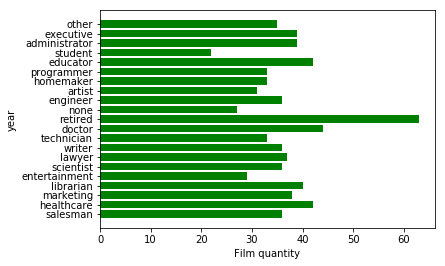

In [12]:
fig, ax = plt.subplots()
# ax.bar()
y_pos = np.arange(len(occupations))
ax.set_yticks(y_pos)
ax.set_yticklabels(occupations)
ax.invert_yaxis()  # labels read top-to-bottom

ax.barh(y_pos, ages,  align='center', color='green', ecolor='black')
ax.set_xlabel('Film quantity')
ax.set_ylabel('year')

从上图可以发现the retired的平均年龄最大，the student的平均年龄最小

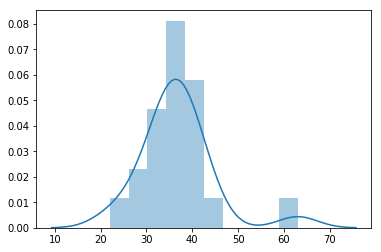

In [13]:
sns.distplot(ages)

In [14]:
count_by_occupation = user_fields.map(lambda fields: (fields[3],1)).reduceByKey(lambda x, y: x + y).collect()

In [15]:
count_by_occupation

[('other', 105),
 ('executive', 32),
 ('administrator', 79),
 ('student', 196),
 ('educator', 95),
 ('programmer', 66),
 ('homemaker', 7),
 ('artist', 28),
 ('engineer', 67),
 ('none', 9),
 ('retired', 14),
 ('doctor', 7),
 ('technician', 27),
 ('writer', 45),
 ('lawyer', 12),
 ('scientist', 31),
 ('entertainment', 18),
 ('librarian', 51),
 ('marketing', 26),
 ('healthcare', 16),
 ('salesman', 12)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

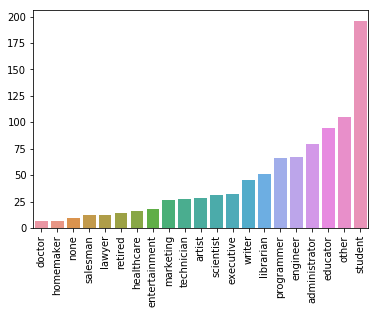

In [16]:
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])
x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

pos = np.arange(len(x_axis))
width = 1.0

sns.barplot(x=x_axis, y=y_axis)
plt.xticks(rotation=90)

In [17]:
count_by_occupation2 = user_fields.map(lambda x: x[3]).countByValue()

In [18]:
count_by_sex = user_fields.map(lambda x: x[2]).countByValue()

In [19]:
type(count_by_sex)

collections.defaultdict

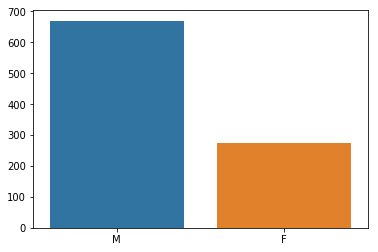

In [20]:
x = list(count_by_sex.keys())
y = list(count_by_sex.values())
sns.barplot(x=x ,y=y)

In [21]:
# 显示第一条数据
movie_data.first()

'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0'

In [22]:
# 显示电影总数
movie_data.count()

1682

In [23]:
# 查看电影发行日期
# 因为部分行不满足函数内的条件，因此会报错
# movie_data.map(lambda x: x.split('|')[2].split('-')[1]).collect()

In [24]:
def convert_year(date):
    try:
#         date.split('-')[2] = int(date.split('-')[2])
#         int(date.split('-')[2])
        return int(date.split('-')[2])
    except:
        return 1900

# print(convert_year('01-Jan-1995'))

In [25]:

# 数据过多，导致不容易绘图，因此仅筛选1980年之后的年份
movie_years = movie_data.map(lambda x: x.split('|')[2]).map(lambda date: convert_year(date)).filter(lambda x: x>1980)
movie_years

PythonRDD[41] at RDD at PythonRDD.scala:48

In [26]:
movie_ages = movie_years.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortByKey()

In [27]:
years = movie_ages.keys().collect()
years_new = []
for x in years:
    years_new.append(str(x))
years_count = movie_ages.values().collect()
years_new = tuple(years_new)

In [28]:
type(years_new)

tuple

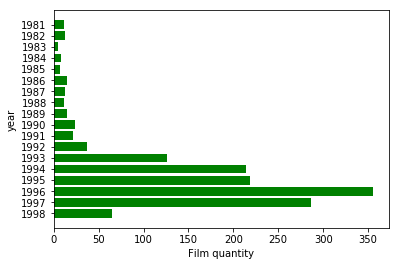

In [29]:
fig, ax = plt.subplots()
# ax.bar()
y_pos = np.arange(len(years_new))
ax.set_yticks(y_pos)
ax.set_yticklabels(years_new)
ax.invert_yaxis()  # labels read top-to-bottom

ax.barh(y_pos, years_count,  align='center',
        color='green', ecolor='black')
ax.set_xlabel('Film quantity')
ax.set_ylabel('year')
# plt.xticks(rotation=90)

In [30]:
movie_data.first()

'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0'

In [31]:
# 统计最多出现的词汇
# movie_data.map(lambda x: x.split('|')[1]).map(lambda x: x.split(' ')).collect()
# movie_data.map(lambda x: x.split('|')[1]).flatMap(lambda x: x.split(' ')).collect()
temp1 = movie_data.map(lambda x: x.split('|')[1]).flatMap(lambda x: x.split(' ')).map(lambda x: (x,1))


temp2 = temp1.reduceByKey(lambda x, y: x+y)

temp3 = temp2.map(lambda x: (x[1],x[0])).sortByKey(False)

words = ['The', 'the', 'of', 'and', 'in', 'A', 'a', 'to', '&', 'on', 'de', 'In', 'for']
number = '19'

temp4 = temp3.filter(lambda x: x[0] > 10).filter(lambda x:x[1] not in words).filter(lambda x:number not in x[1]).collect()

In [32]:
temp4

[(27, 'Love'),
 (23, 'Man'),
 (22, 'My'),
 (18, 'Life'),
 (13, 'Star'),
 (13, 'Night'),
 (13, 'I'),
 (13, 'Time'),
 (12, 'Dead'),
 (12, 'It'),
 (12, 'Day'),
 (11, 'Last'),
 (11, 'Big')]

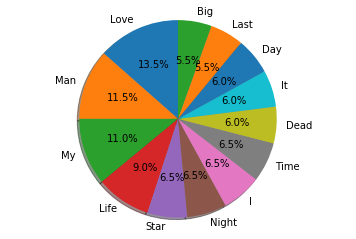

In [33]:
def plot_pie(map):
    labels = []
    sizes = []
    for x in map:
        labels.append(x[1])
        sizes.append(x[0])
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
plot_pie(temp4)

In [34]:
movie_data.first()

'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0'

In [35]:
# 查看电影评分数据

temp = rating_data.take(5)
rating_data_count = rating_data.count()

print(temp)
print('电影评分数据的总数', rating_data_count)


['196\t242\t3\t881250949', '186\t302\t3\t891717742', '22\t377\t1\t878887116', '244\t51\t2\t880606923', '166\t346\t1\t886397596']
电影评分数据的总数 100000


In [36]:
ratings = rating_data.map(lambda x: int(x.split('\t')[2]))

In [37]:
all_rating = ratings.distinct()
max_rating = ratings.reduce(lambda x, y: x if x > y else y)
min_rating = ratings.reduce(lambda x, y: y if x > y else x)
mean_rating = ratings.reduce(lambda x, y: x + y) / rating_data_count

print('所有数据：', all_rating)
print('最大值：', max_rating)
print('最小值:', min_rating)
print('均值:', mean_rating)

所有数据： PythonRDD[76] at RDD at PythonRDD.scala:48
最大值： 5
最小值: 1
均值: 3.52986


In [38]:
# spark内部实现了统计功能
ratings.stats()

(count: 100000, mean: 3.5298600000000024, stdev: 1.12566797076, max: 5.0, min: 1.0)

In [39]:
count_by_rating = ratings.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).collect()

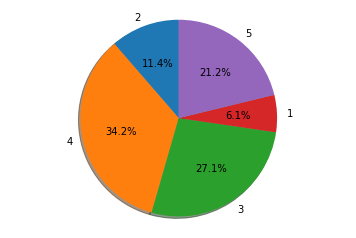

[(2, 11370), (4, 34174), (3, 27145), (1, 6110), (5, 21201)]

In [40]:
def plot_pie(map):
    labels = []
    sizes = []
    for x in map:
        labels.append(x[0])
        sizes.append(x[1])
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    
    
plot_pie(count_by_rating)
count_by_rating

In [41]:
rating_data.take(5)

['196\t242\t3\t881250949',
 '186\t302\t3\t891717742',
 '22\t377\t1\t878887116',
 '244\t51\t2\t880606923',
 '166\t346\t1\t886397596']

<Container object of 943 artists>

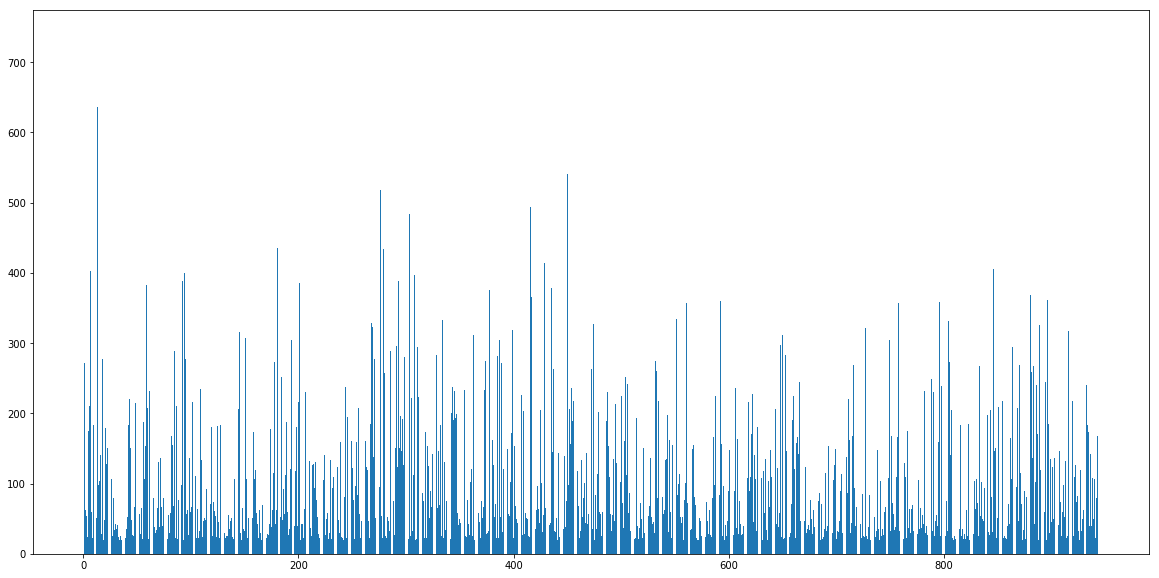

In [44]:
# 每个用户评分过多少部电影
count_by_user = rating_data.map(lambda x: int(x.split('\t')[0])).map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortByKey().collect()
# count_by_user.collect()
users = []
counts = []
for x in count_by_user:
    users.append(x[0])
    counts.append(x[1])
plt.figure(figsize=(20, 10))
plt.bar(users, counts)